In [1]:
import sys 
sys.path.append('..')


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils.correlation import dropna_spearmanr, get_df_bootstrap_corr, get_df_corr

In [7]:
a_classified = pd.read_excel('../input/quotient_deviation_df_A_CLASSIFIED.xlsx')

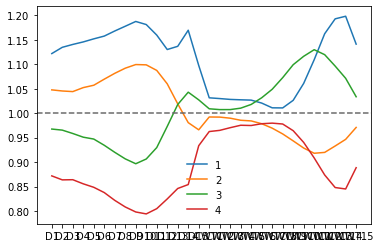

In [13]:
for i in range(4):
    plt.plot(a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31],label=str(i+1))
plt.axhline(y=1, color='dimgray', linestyle='--')
plt.legend(frameon=False)

In [4]:
from numpy import trapz

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[:15] if el >= 1])
    neg = trapz([el for el in selected[:15] if el < 1])
    print('Diam', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected[15:] if el >= 1])
    neg = trapz([el for el in selected[15:] if el < 1])
    print('CWT', i+1, ':', pos - neg)

for i in range(4):
    selected = a_classified[a_classified['Class 4']==i].mean(axis=0)[1:31]
    pos = trapz([el for el in selected if el >= 1])
    neg = trapz([el for el in selected if el < 1])
    print('Diam + CWT', i+1, ':', pos - neg)

Diam 1 : 16.147704995346956
Diam 2 : 11.846233096008525
Diam 3 : -8.220909367821411
Diam 4 : -11.72601158144886
CWT 1 : 14.988937491111374
CWT 2 : -13.427999589801171
CWT 3 : 14.848086172399565
CWT 4 : -13.127053279195788
Diam + CWT 1 : 32.20099378848954
Diam + CWT 2 : -2.560847024946554
Diam + CWT 3 : 7.64521568483503
Diam + CWT 4 : -25.801087389383383


In [7]:
crn = pd.read_excel('../input/BGD_chron.xlsx')
crn = crn[crn['Year']>1812]
areas_df = pd.read_csv('../output/Year_Areas_difference_fixed.csv')

In [9]:
Min_PDSI = pd.read_excel('../input/Minusinsk-PDSI_SPEI-MJJAS.xlsx', sheet_name='Min_PDSI')
Min_SPEI = pd.read_excel('../input/Minusinsk-PDSI_SPEI-MJJAS.xlsx', sheet_name='Min_SPEI')

In [4]:
scale_table = pd.read_excel('../output/to_send/007/NEW_AREA.xlsx')

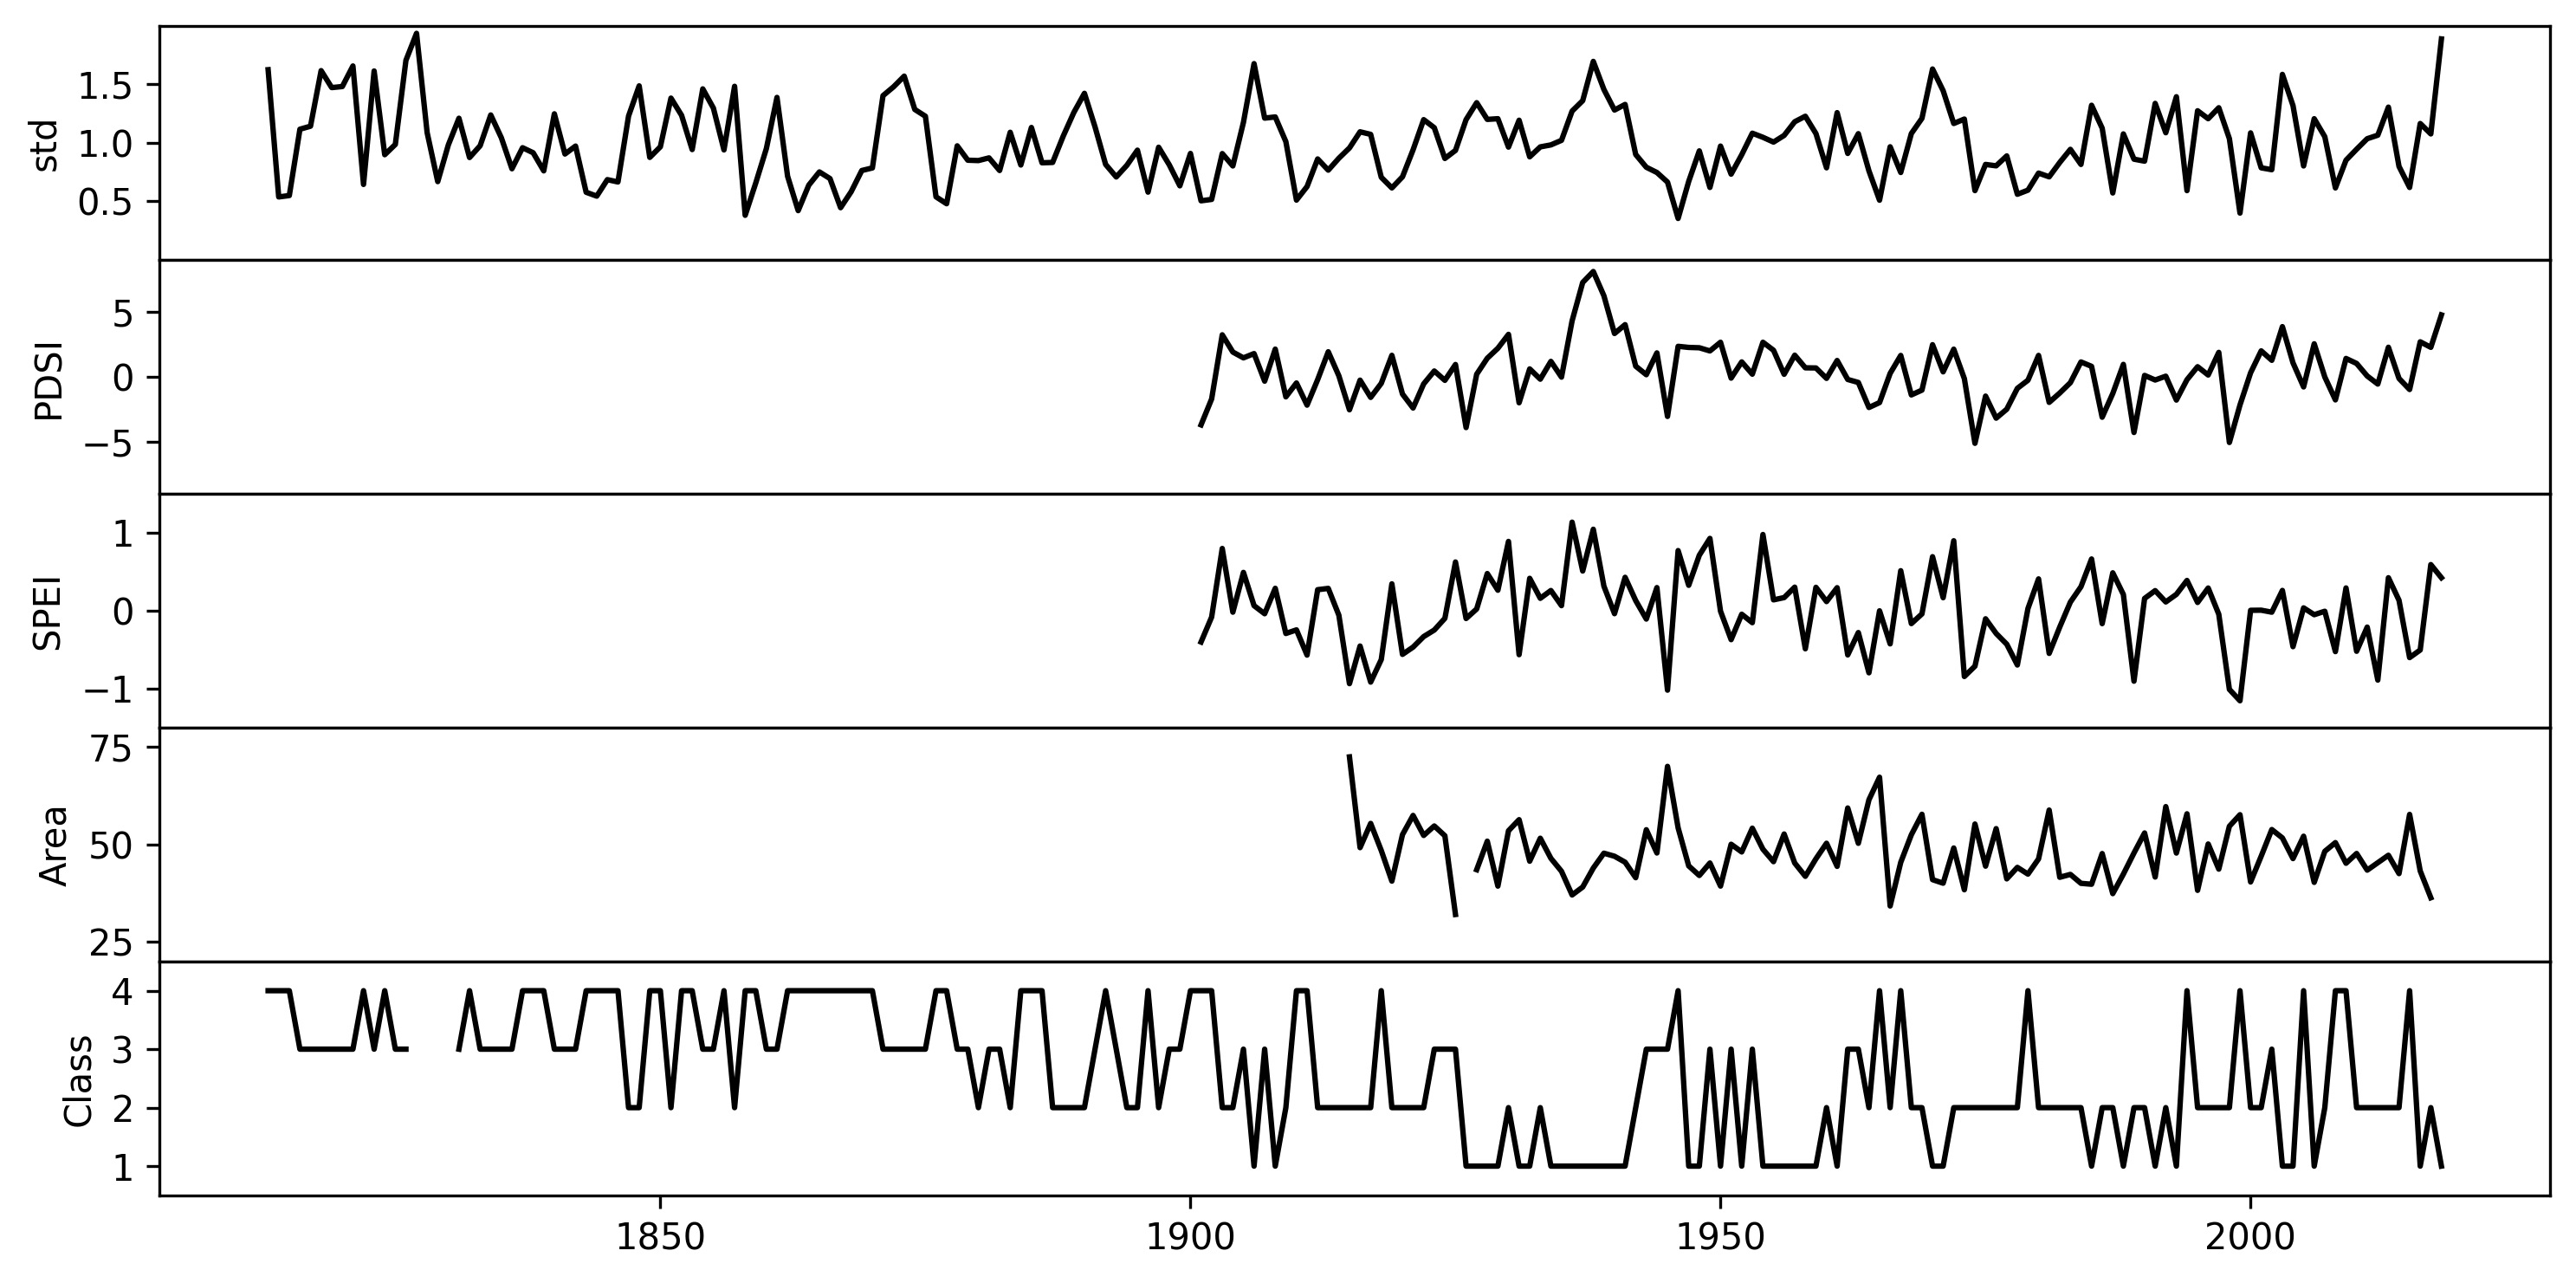

In [15]:
fig, axes = plt.subplots( nrows=5, ncols=1, dpi=300, figsize=(10,5), sharex=True)
plt.subplots_adjust(hspace=0, left=.06, right=.98, top=.99, bottom=.09)
#axes[0].plot(crn['Year'], crn['res'], c='black', label='res')
axes[0].plot(scale_table['Year'], scale_table['std'], c='black', label='std')
axes[1].plot(scale_table['Year'], scale_table['Mean_PDSI'], c='black', label='PDSI')
axes[2].plot(scale_table['Year'], scale_table['Mean_SPEI'], c='black', label='SPEI')
axes[3].plot(scale_table['Year'], scale_table['AREA'], c='black', label='Area')
axes[4].plot(scale_table['Year'], scale_table['CLASS'], color='black')

axes[0].set_ylim([0, 2])
axes[1].set_ylim([-9, 9])
axes[2].set_ylim([-1.5, 1.5])
axes[3].set_ylim([20, 80])
axes[4].set_ylim([0.5,4.5])

axes[0].set_ylabel('std')
axes[1].set_ylabel('PDSI')
axes[2].set_ylabel('SPEI')
axes[3].set_ylabel('Area')
axes[4].set_ylabel('Class')

axes[0].set_yticks(np.arange(0.5,2, 0.5))
axes[3].set_yticks([25, 50, 75])
axes[4].set_yticks(range(1,5))
plt.show()


In [16]:

fig.savefig(f'../output/Fig 08.png', dpi=300) 
plt.close(fig)

In [10]:
df = crn.merge(Min_PDSI[['Year', 'Mean']], on='Year', how='left', suffixes=('_crn', '_PDSI')
         ).merge(Min_SPEI[['Year', 'Mean']], on='Year', how='left', suffixes=('_PDSI', '_SPEI')
                ).merge(areas_df, on='Year', how='left'
                        ).merge(a_classified[['Year', 'Class 4']], on='Year', how='left')

In [12]:
df.to_excel('../output/to_send/005/scale_table.xlsx', index=False)

In [15]:
scale_table = pd.read_excel('../output/to_send/005/scale_table.xlsx')

In [4]:
scale_table

,Year,std,res,Mean_PDSI,Mean_SPEI,AREA,CLASS
0,1813,1.625,1.312,NaN,NaN,NaN,4.0
1,1814,0.537,0.536,NaN,NaN,NaN,4.0
2,1815,0.549,0.624,NaN,NaN,NaN,4.0
3,1816,1.116,1.172,NaN,NaN,NaN,3.0
4,1817,1.142,1.194,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...
201,2014,0.798,0.705,-0.135421,0.132161,74.123124,2.0
202,2015,0.618,0.619,-0.986575,-0.602905,85.534619,4.0
203,2016,1.165,1.239,2.685409,-0.505205,68.752470,1.0
204,2017,1.076,0.941,2.259978,0.590161,65.020415,2.0


In [17]:
fine_corr_df = get_df_corr(scale_table.drop(columns=['Year']), 'spearman')

In [18]:
fine_corr_df

,std,res,Mean_PDSI,Mean_SPEI,Area,Class 4
std,1.00\n(p=0.000),0.92\n(p=0.000),0.40\n(p=0.000),0.24\n(p=0.009),-0.23\n(p=0.018),-0.51\n(p=0.000)
res,0.92\n(p=0.000),1.00\n(p=0.000),0.40\n(p=0.000),0.22\n(p=0.015),-0.28\n(p=0.004),-0.54\n(p=0.000)
Mean_PDSI,0.40\n(p=0.000),0.40\n(p=0.000),1.00\n(p=0.000),0.71\n(p=0.000),-0.59\n(p=0.000),-0.43\n(p=0.000)
Mean_SPEI,0.24\n(p=0.009),0.22\n(p=0.015),0.71\n(p=0.000),1.00\n(p=0.000),-0.58\n(p=0.000),-0.30\n(p=0.001)
Area,-0.23\n(p=0.018),-0.28\n(p=0.004),-0.59\n(p=0.000),-0.58\n(p=0.000),1.00\n(p=0.000),0.32\n(p=0.001)
Class 4,-0.51\n(p=0.000),-0.54\n(p=0.000),-0.43\n(p=0.000),-0.30\n(p=0.001),0.32\n(p=0.001),1.00\n(p=0.000)


In [19]:
fine_corr_df.to_excel('../output/scale_corr_table.xlsx')

In [20]:
df_bootstrap = get_df_bootstrap_corr(scale_table.drop(columns=['Year']))


In [21]:
df_bootstrap

,std,res,Mean_PDSI,Mean_SPEI,Area,Class 4
std,NaN,0.91\n(p=0.000),0.39\n(p=0.000),0.24\n(p=0.010),-0.22\n(p=0.024),-0.51\n(p=0.000)
res,0.91\n(p=0.000),NaN,0.37\n(p=0.000),0.22\n(p=0.015),-0.27\n(p=0.006),-0.53\n(p=0.000)
Mean_PDSI,0.39\n(p=0.000),0.37\n(p=0.000),NaN,0.69\n(p=0.000),-0.57\n(p=0.000),-0.41\n(p=0.000)
Mean_SPEI,0.24\n(p=0.010),0.22\n(p=0.015),0.69\n(p=0.000),NaN,-0.56\n(p=0.000),-0.29\n(p=0.001)
Area,-0.22\n(p=0.024),-0.27\n(p=0.006),-0.57\n(p=0.000),-0.56\n(p=0.000),NaN,0.30\n(p=0.002)
Class 4,-0.51\n(p=0.000),-0.53\n(p=0.000),-0.41\n(p=0.000),-0.29\n(p=0.001),0.30\n(p=0.002),NaN


In [11]:
df_bootstrap = get_df_bootstrap_corr(scale_table.drop(columns=['Year']))

In [12]:
df_bootstrap

,std,res,Mean_PDSI,Mean_SPEI,AREA,CLASS
std,NaN,0.91\n(p=0.000),0.39\n(p=0.000),0.24\n(p=0.010),-0.29\n(p=0.003),-0.51\n(p=0.000)
res,0.91\n(p=0.000),NaN,0.37\n(p=0.000),0.22\n(p=0.015),-0.34\n(p=0.000),-0.53\n(p=0.000)
Mean_PDSI,0.39\n(p=0.000),0.37\n(p=0.000),NaN,0.69\n(p=0.000),-0.44\n(p=0.000),-0.41\n(p=0.000)
Mean_SPEI,0.24\n(p=0.010),0.22\n(p=0.015),0.69\n(p=0.000),NaN,-0.39\n(p=0.000),-0.29\n(p=0.001)
AREA,-0.29\n(p=0.003),-0.34\n(p=0.000),-0.44\n(p=0.000),-0.39\n(p=0.000),NaN,0.39\n(p=0.000)
CLASS,-0.51\n(p=0.000),-0.53\n(p=0.000),-0.41\n(p=0.000),-0.29\n(p=0.001),0.39\n(p=0.000),NaN


In [17]:
df_bootstrap.to_excel('../output/to_send/007/df_bootstrap.xlsx')